In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
datos = pd.read_csv('../data/measurements/time.txt')
datos

,sizeA,typeA,largeA,idA,sizeB,typeB,largeB,idB,tiempo_naive_microseg,tiempo_strassen_microseg
0,16,densa,D0,a,16,densa,D0,a,0.092,0.471
1,16,densa,D0,b,16,densa,D0,b,0.184,0.342
2,16,densa,D0,c,16,densa,D0,c,0.134,0.355
3,16,densa,D10,a,16,densa,D10,a,0.173,0.348
4,16,densa,D10,b,16,densa,D10,b,0.105,0.288
...,...,...,...,...,...,...,...,...,...,...
67,1024,dispersa,D0,b,1024,dispersa,D0,b,6541.570,6955.810
68,1024,dispersa,D0,c,1024,dispersa,D0,c,6569.230,6911.960
69,1024,dispersa,D10,a,1024,dispersa,D10,a,6494.970,6523.080
70,1024,dispersa,D10,b,1024,dispersa,D10,b,6512.100,6417.180


In [2]:
# Filtrar matrices densas
matrices_densas = datos[(datos['typeA'] == 'densa') & (datos['typeB'] == 'densa')]

matrices_densas

,sizeA,typeA,largeA,idA,sizeB,typeB,largeB,idB,tiempo_naive_microseg,tiempo_strassen_microseg
0,16,densa,D0,a,16,densa,D0,a,0.092,0.471
1,16,densa,D0,b,16,densa,D0,b,0.184,0.342
2,16,densa,D0,c,16,densa,D0,c,0.134,0.355
3,16,densa,D10,a,16,densa,D10,a,0.173,0.348
4,16,densa,D10,b,16,densa,D10,b,0.105,0.288
5,16,densa,D10,c,16,densa,D10,c,0.105,0.267
18,64,densa,D0,a,64,densa,D0,a,3.555,3.978
19,64,densa,D0,b,64,densa,D0,b,3.369,3.315
20,64,densa,D0,c,64,densa,D0,c,2.658,2.923
21,64,densa,D10,a,64,densa,D10,a,2.293,2.386


In [4]:
# Agrupar matrices densas por tamaño y calcular el promedio de tiempo de ejecución
promedios_densas = matrices_densas.groupby('sizeA')[['tiempo_naive_microseg', 'tiempo_strassen_microseg']].mean()

print(promedios_densas)

       tiempo_naive_microseg  tiempo_strassen_microseg
sizeA                                                 
16                  0.132167                  0.345167
64                  2.627500                  2.877167
256               102.378167                 98.148500
1024             6459.088333               6650.368333


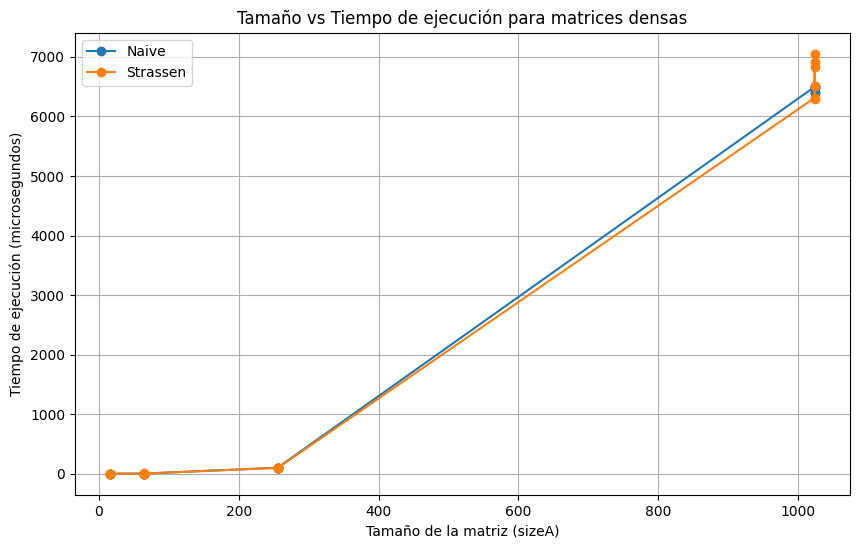

In [3]:
plt.figure(figsize=(10, 6))

# Graficar tiempo de ejecución para el algoritmo naive
plt.plot(matrices_densas['sizeA'], matrices_densas['tiempo_naive_microseg'], label='Naive', marker='o')

# Graficar tiempo de ejecución para el algoritmo de Strassen
plt.plot(matrices_densas['sizeA'], matrices_densas['tiempo_strassen_microseg'], label='Strassen', marker='o')

# Configurar etiquetas y título
plt.xlabel('Tamaño de la matriz (sizeA)')
plt.ylabel('Tiempo de ejecución (microsegundos)')
plt.title('Tamaño vs Tiempo de ejecución para matrices densas')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [6]:
#Filtrar matrices diagonales
matrices_diagonales = datos[(datos['typeA'] == 'diagonal') & (datos['typeB'] == 'diagonal')]
matrices_diagonales

,sizeA,typeA,largeA,idA,sizeB,typeB,largeB,idB,tiempo_naive_microseg,tiempo_strassen_microseg
6,16,diagonal,D0,a,16,diagonal,D0,a,0.087,0.222
7,16,diagonal,D0,b,16,diagonal,D0,b,0.087,0.221
8,16,diagonal,D0,c,16,diagonal,D0,c,0.054,0.131
9,16,diagonal,D10,a,16,diagonal,D10,a,0.054,0.130
10,16,diagonal,D10,b,16,diagonal,D10,b,0.054,0.131
11,16,diagonal,D10,c,16,diagonal,D10,c,0.054,0.130
24,64,diagonal,D0,a,64,diagonal,D0,a,1.676,1.828
25,64,diagonal,D0,b,64,diagonal,D0,b,1.558,1.846
26,64,diagonal,D0,c,64,diagonal,D0,c,1.619,1.848
27,64,diagonal,D10,a,64,diagonal,D10,a,1.619,2.064


In [7]:
# Agrupar matrices diagonales por tamaño y calcular el promedio de tiempo de ejecución
promedios_diagonales = matrices_diagonales.groupby('sizeA')[['tiempo_naive_microseg', 'tiempo_strassen_microseg']].mean()
print(promedios_diagonales)


       tiempo_naive_microseg  tiempo_strassen_microseg
sizeA                                                 
16                    0.0650                  0.160833
64                    1.5980                  1.863000
256                 102.1145                 96.707667
1024               6498.1300               6623.985000


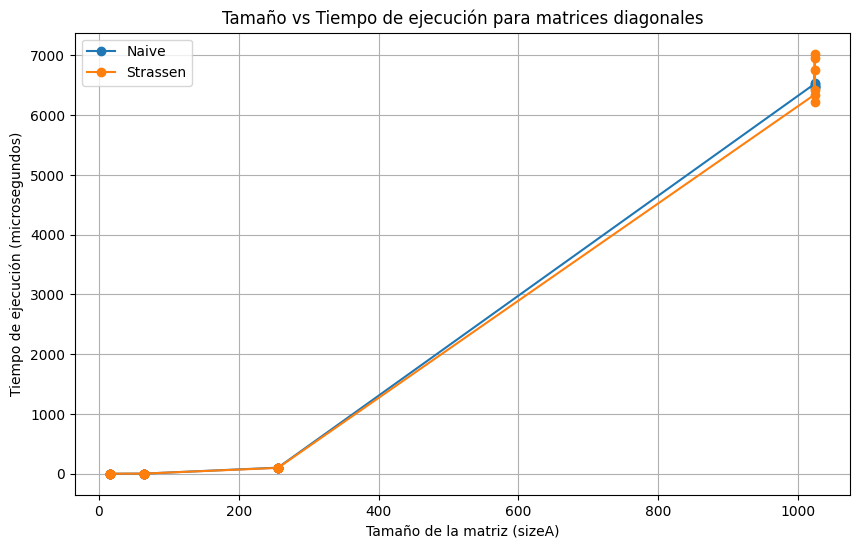

In [5]:
# grafica para matrices diagonales
plt.figure(figsize=(10, 6))
# Graficar tiempo de ejecución para el algoritmo naive
plt.plot(matrices_diagonales['sizeA'], matrices_diagonales['tiempo_naive_microseg'], label='Naive', marker='o')
# Graficar tiempo de ejecución para el algoritmo de Strassen
plt.plot(matrices_diagonales['sizeA'], matrices_diagonales['tiempo_strassen_microseg'], label='Strassen', marker='o')
# Configurar etiquetas y título
plt.xlabel('Tamaño de la matriz (sizeA)')
plt.ylabel('Tiempo de ejecución (microsegundos)')
plt.title('Tamaño vs Tiempo de ejecución para matrices diagonales')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()


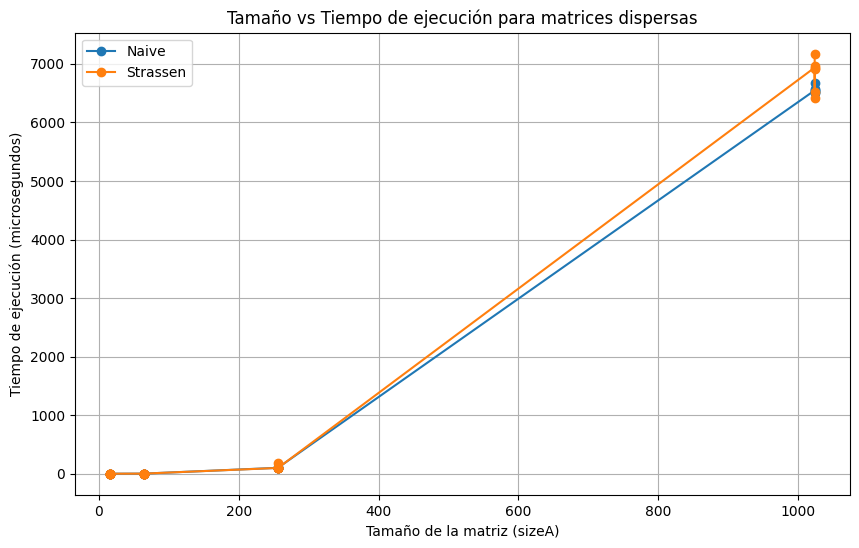

In [8]:
#Filtrando matrices dispersas
matrices_dispersas = datos[(datos['typeA'] == 'dispersa') & (datos['typeB'] == 'dispersa')]
matrices_dispersas
# grafica para matrices dispersas
plt.figure(figsize=(10, 6))
# Graficar tiempo de ejecución para el algoritmo naive
plt.plot(matrices_dispersas['sizeA'], matrices_dispersas['tiempo_naive_microseg'], label='Naive', marker='o')
# Graficar tiempo de ejecución para el algoritmo de Strassen
plt.plot(matrices_dispersas['sizeA'], matrices_dispersas['tiempo_strassen_microseg'], label='Strassen', marker='o')
# Configurar etiquetas y título
plt.xlabel('Tamaño de la matriz (sizeA)')
plt.ylabel('Tiempo de ejecución (microsegundos)')
plt.title('Tamaño vs Tiempo de ejecución para matrices dispersas')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()


In [9]:
# Agrupar matrices dispersoas por tamaño y calcular el promedio de tiempo de ejecución

promedios_dispersas = matrices_dispersas.groupby('sizeA')[['tiempo_naive_microseg', 'tiempo_strassen_microseg']].mean()
print(promedios_dispersas)


       tiempo_naive_microseg  tiempo_strassen_microseg
sizeA                                                 
16                  0.055167                  0.144667
64                  1.561000                  1.782167
256               104.116500                112.608167
1024             6555.460000               6819.771667
